<a href="https://colab.research.google.com/github/smdr111/ML_1st_project/blob/main/Business%26Data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [34]:
# changing dtypes of columns : 'size' and 'price' to 'int'
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7564 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [46]:
df.isna().sum()

,0
location,0
district,0
rooms,0
size,1
level,0
max_levels,0
price,99


In [79]:
df.describe()

,rooms,size,level,max_levels,price
count,7565.000000,7564.000000,7565.000000,7565.000000,7.466000e+03
mean,2.625644,113.268990,3.699273,6.038202,7.133421e+04
std,1.085201,1491.312092,2.237275,2.613271,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


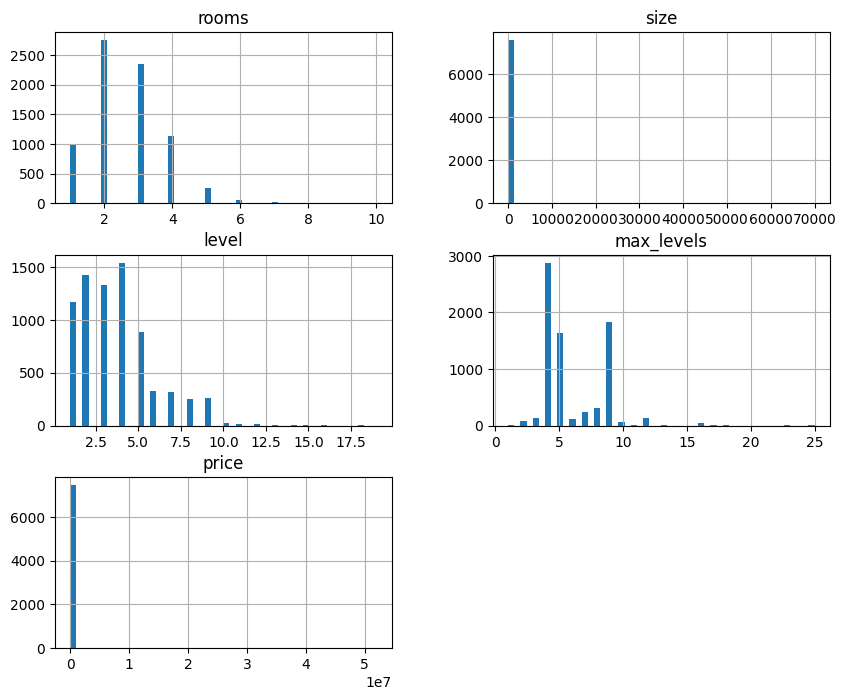

In [57]:
df.hist(bins=50,figsize=(10,8))
plt.show()

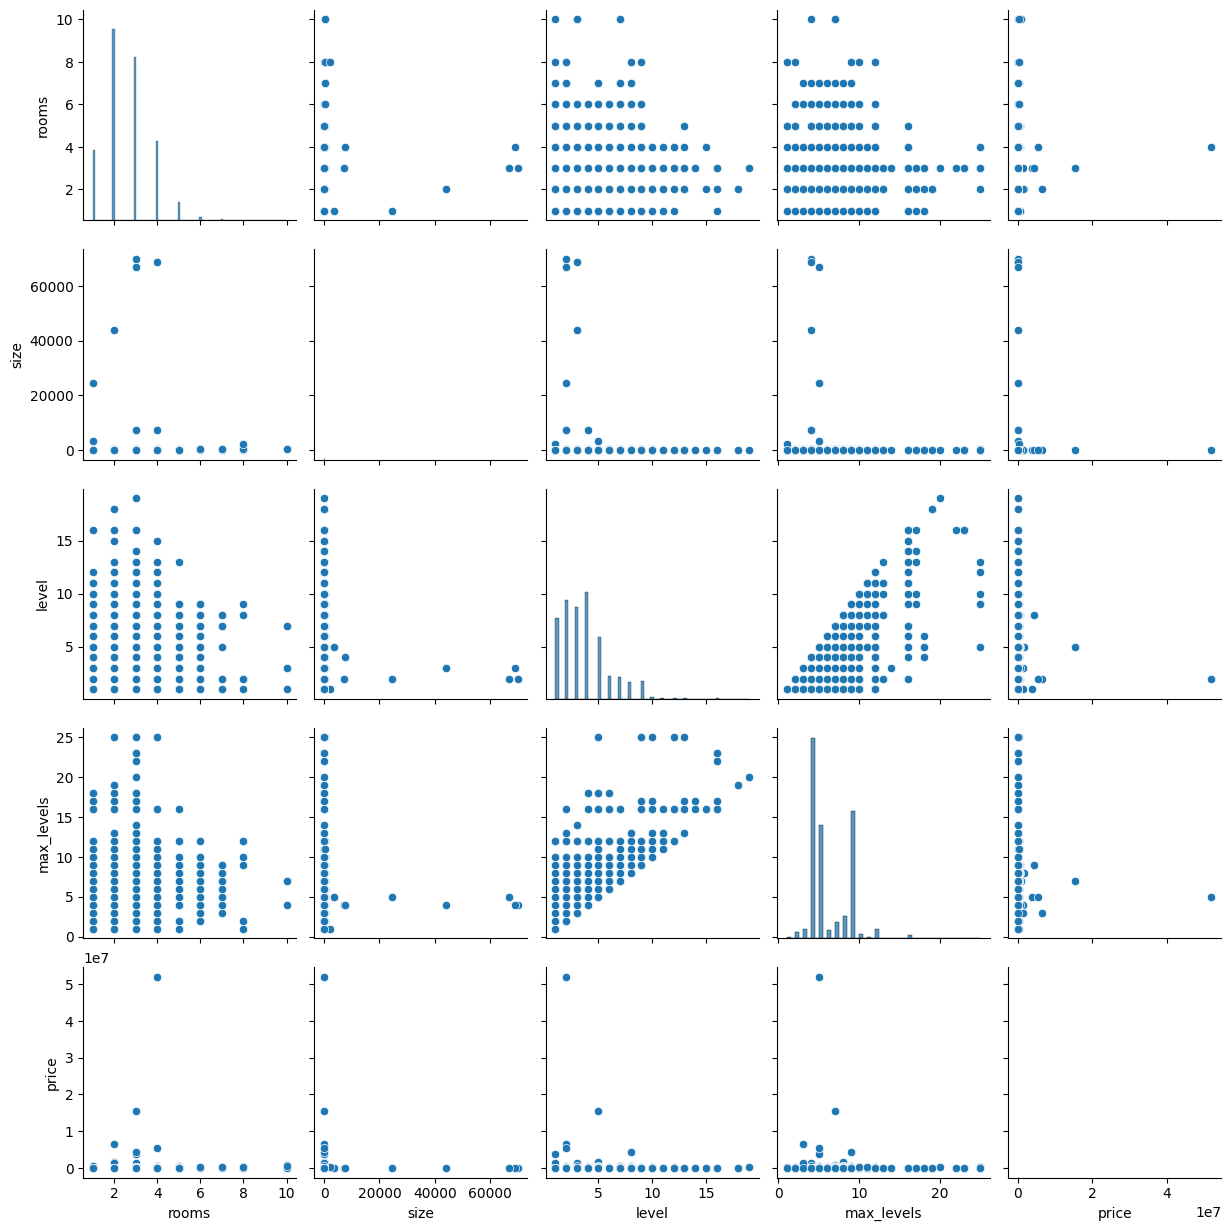

In [60]:
sns.pairplot(df)
plt.show()

In [62]:
df[df.columns[2:]].corrwith(df['price'])

,0
rooms,0.056176
size,0.001106
level,-0.003454
max_levels,0.011168
price,1.000000


In [63]:
df[df['price'].isna()]

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,NaN
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,NaN
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,NaN
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,NaN
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,NaN
...,...,...,...,...,...,...,...
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,NaN
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,NaN
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208.0,1,7,NaN
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35.0,2,9,NaN


In [67]:
df[df['size'].isna()]

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,NaN,3,5,150000.0


In [76]:
df['price'].median()

46500.0

In [68]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')


In [80]:
df_num=df[df.columns[2:]]

In [89]:
imputer.fit(df_num)

SimpleImputer()

In [90]:
df_full=imputer.transform(df_num)

In [91]:
df_full

array([[3.0000e+00, 5.7000e+01, 4.0000e+00, 4.0000e+00, 5.2000e+04],
       [2.0000e+00, 5.2000e+01, 4.0000e+00, 5.0000e+00, 5.6000e+04],
       [2.0000e+00, 4.2000e+01, 4.0000e+00, 4.0000e+00, 3.7000e+04],
       ...,
       [2.0000e+00, 6.4000e+01, 3.0000e+00, 9.0000e+00, 4.0000e+04],
       [1.0000e+00, 1.8000e+01, 1.0000e+00, 4.0000e+00, 1.1000e+04],
       [1.0000e+00, 3.0000e+01, 2.0000e+00, 4.0000e+00, 2.2914e+04]])

In [93]:
df_full=pd.DataFrame(df_full,columns=df_num.columns,index=df_num.index)

In [94]:
df_full.isna().sum()

,0
rooms,0
size,0
level,0
max_levels,0
price,0


In [95]:
df_full.corrwith(df_full['price'])

,0
rooms,0.055704
size,0.001106
level,-0.003430
max_levels,0.011068
price,1.000000


In [99]:
df_full=df_full.join(df[df.columns[:2]])

In [100]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rooms       7565 non-null   float64
 1   size        7565 non-null   float64
 2   level       7565 non-null   float64
 3   max_levels  7565 non-null   float64
 4   price       7565 non-null   float64
 5   location    7565 non-null   object 
 6   district    7565 non-null   object 
dtypes: float64(5), object(2)
memory usage: 413.8+ KB


In [105]:
df_full[df_full.columns[:5]]=df_full[df_full.columns[:5]].astype(int,copy=False)

In [107]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rooms       7565 non-null   int64 
 1   size        7565 non-null   int64 
 2   level       7565 non-null   int64 
 3   max_levels  7565 non-null   int64 
 4   price       7565 non-null   int64 
 5   location    7565 non-null   object
 6   district    7565 non-null   object
dtypes: int64(5), object(2)
memory usage: 413.8+ KB
